# **Lapes - 2024**
---

## Importando bibliotecas

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

## Pré-processamento de dados


In [3]:
df = pd.read_csv('startup_data.csv')
df

,Unnamed: 0,state_code,latitude,longitude,zip_code,id,city,Unnamed: 6,name,labels,...,object_id,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,is_top500,status
0,1005,CA,42.358880,-71.056820,92101,c:6669,San Diego,NaN,Bandsintown,1,...,c:6669,0,1,0,0,0,0,1.0000,0,acquired
1,204,CA,37.238916,-121.973718,95032,c:16283,Los Gatos,NaN,TriCipher,1,...,c:16283,1,0,0,1,1,1,4.7500,1,acquired
2,1001,CA,32.901049,-117.192656,92121,c:65620,San Diego,San Diego CA 92121,Plixi,1,...,c:65620,0,0,1,0,0,0,4.0000,1,acquired
3,738,CA,37.320309,-122.050040,95014,c:42668,Cupertino,Cupertino CA 95014,Solidcore Systems,1,...,c:42668,0,0,0,1,1,1,3.3333,1,acquired
4,1002,CA,37.779281,-122.419236,94105,c:65806,San Francisco,San Francisco CA 94105,Inhale Digital,0,...,c:65806,1,1,0,0,0,0,1.0000,1,closed
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
918,352,CA,37.740594,-122.376471,94107,c:21343,San Francisco,NaN,CoTweet,1,...,c:21343,0,0,1,0,0,0,6.0000,1,acquired
919,721,MA,42.504817,-71.195611,1803,c:41747,Burlington,Burlington MA 1803,Reef Point Systems,0,...,c:41747,1,0,0,1,0,0,2.6667,1,closed
920,557,CA,37.408261,-122.015920,94089,c:31549,Sunnyvale,NaN,Paracor Medical,0,...,c:31549,0,0,0,0,0,1,8.0000,1,closed
921,589,CA,37.556732,-122.288378,94404,c:33198,San Francisco,NaN,Causata,1,...,c:33198,0,0,1,1,0,0,1.0000,1,acquired


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 923 entries, 0 to 922
Data columns (total 49 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                923 non-null    int64  
 1   state_code                923 non-null    object 
 2   latitude                  923 non-null    float64
 3   longitude                 923 non-null    float64
 4   zip_code                  923 non-null    object 
 5   id                        923 non-null    object 
 6   city                      923 non-null    object 
 7   Unnamed: 6                430 non-null    object 
 8   name                      923 non-null    object 
 9   labels                    923 non-null    int64  
 10  founded_at                923 non-null    object 
 11  closed_at                 335 non-null    object 
 12  first_funding_at          923 non-null    object 
 13  last_funding_at           923 non-null    object 
 14  age_first_

In [5]:
df.head()

,Unnamed: 0,state_code,latitude,longitude,zip_code,id,city,Unnamed: 6,name,labels,...,object_id,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,is_top500,status
0,1005,CA,42.358880,-71.056820,92101,c:6669,San Diego,NaN,Bandsintown,1,...,c:6669,0,1,0,0,0,0,1.0000,0,acquired
1,204,CA,37.238916,-121.973718,95032,c:16283,Los Gatos,NaN,TriCipher,1,...,c:16283,1,0,0,1,1,1,4.7500,1,acquired
2,1001,CA,32.901049,-117.192656,92121,c:65620,San Diego,San Diego CA 92121,Plixi,1,...,c:65620,0,0,1,0,0,0,4.0000,1,acquired
3,738,CA,37.320309,-122.050040,95014,c:42668,Cupertino,Cupertino CA 95014,Solidcore Systems,1,...,c:42668,0,0,0,1,1,1,3.3333,1,acquired
4,1002,CA,37.779281,-122.419236,94105,c:65806,San Francisco,San Francisco CA 94105,Inhale Digital,0,...,c:65806,1,1,0,0,0,0,1.0000,1,closed


In [6]:
df = df.rename(columns={'Unnamed: 6': 'address'})

In [7]:
cleaned_data = df.drop(columns=['Unnamed: 0'])
cleaned_data

,state_code,latitude,longitude,zip_code,id,city,address,name,labels,founded_at,...,object_id,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,is_top500,status
0,CA,42.358880,-71.056820,92101,c:6669,San Diego,NaN,Bandsintown,1,1/1/2007,...,c:6669,0,1,0,0,0,0,1.0000,0,acquired
1,CA,37.238916,-121.973718,95032,c:16283,Los Gatos,NaN,TriCipher,1,1/1/2000,...,c:16283,1,0,0,1,1,1,4.7500,1,acquired
2,CA,32.901049,-117.192656,92121,c:65620,San Diego,San Diego CA 92121,Plixi,1,3/18/2009,...,c:65620,0,0,1,0,0,0,4.0000,1,acquired
3,CA,37.320309,-122.050040,95014,c:42668,Cupertino,Cupertino CA 95014,Solidcore Systems,1,1/1/2002,...,c:42668,0,0,0,1,1,1,3.3333,1,acquired
4,CA,37.779281,-122.419236,94105,c:65806,San Francisco,San Francisco CA 94105,Inhale Digital,0,8/1/2010,...,c:65806,1,1,0,0,0,0,1.0000,1,closed
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
918,CA,37.740594,-122.376471,94107,c:21343,San Francisco,NaN,CoTweet,1,1/1/2009,...,c:21343,0,0,1,0,0,0,6.0000,1,acquired
919,MA,42.504817,-71.195611,1803,c:41747,Burlington,Burlington MA 1803,Reef Point Systems,0,1/1/1998,...,c:41747,1,0,0,1,0,0,2.6667,1,closed
920,CA,37.408261,-122.015920,94089,c:31549,Sunnyvale,NaN,Paracor Medical,0,1/1/1999,...,c:31549,0,0,0,0,0,1,8.0000,1,closed
921,CA,37.556732,-122.288378,94404,c:33198,San Francisco,NaN,Causata,1,1/1/2009,...,c:33198,0,0,1,1,0,0,1.0000,1,acquired


In [8]:
missing_values = cleaned_data.isnull().sum()
print(missing_values)

state_code                    0
latitude                      0
longitude                     0
zip_code                      0
id                            0
city                          0
address                     493
name                          0
labels                        0
founded_at                    0
closed_at                   588
first_funding_at              0
last_funding_at               0
age_first_funding_year        0
age_last_funding_year         0
age_first_milestone_year    152
age_last_milestone_year     152
relationships                 0
funding_rounds                0
funding_total_usd             0
milestones                    0
state_code.1                  1
is_CA                         0
is_NY                         0
is_MA                         0
is_TX                         0
is_otherstate                 0
category_code                 0
is_software                   0
is_web                        0
is_mobile                     0
is_enter

In [9]:
cleaned_data['status'] = cleaned_data['status'].replace({'acquired': 'adquirido', 'closed': 'fechado'})
cleaned_data['status'].value_counts()

,count
status,
adquirido,597
fechado,326


In [10]:
cleaned_data['funding_total_usd'] = pd.to_numeric(cleaned_data['funding_total_usd'], errors='coerce')
cleaned_data['funding_total_usd'] = cleaned_data['funding_total_usd'].fillna(cleaned_data['funding_total_usd'].median())

In [11]:
cleaned_data['founded_at'] = pd.to_datetime(cleaned_data['founded_at'], errors='coerce')
median_date = cleaned_data['founded_at'].median()
cleaned_data['founded_at'] = cleaned_data['founded_at'].fillna(median_date)
cleaned_data['founded_year'] = cleaned_data['founded_at'].dt.year

## Análise de Dados


In [20]:
count_status = cleaned_data['status'].value_counts()

colunas_investimento = ['has_angel', 'has_VC', 'has_roundA', 'has_roundB', 'has_roundC', 'has_roundD']
count_investimento = cleaned_data[colunas_investimento].sum()

stats = cleaned_data.describe()

count_status, count_investimento, stats


(status
 adquirido    597
 fechado      326
 Name: count, dtype: int64,
 has_angel     235
 has_VC        301
 has_roundA    469
 has_roundB    362
 has_roundC    215
 has_roundD     92
 dtype: int64,
          latitude   longitude      labels                     founded_at  \
 count  923.000000  923.000000  923.000000                            923   
 mean    38.517442 -103.539212    0.646804  2005-09-10 00:57:43.488624128   
 min     25.752358 -122.756956    0.000000            1984-01-01 00:00:00   
 25%     37.388869 -122.198732    0.000000            2003-01-01 00:00:00   
 50%     37.779281 -118.374037    1.000000            2006-01-01 00:00:00   
 75%     40.730646  -77.214731    1.000000            2008-04-01 00:00:00   
 max     59.335232   18.057121    1.000000            2013-04-16 00:00:00   
 std      3.741497   22.394167    0.478222                            NaN   
 
                            closed_at  age_first_funding_year  \
 count                            335  

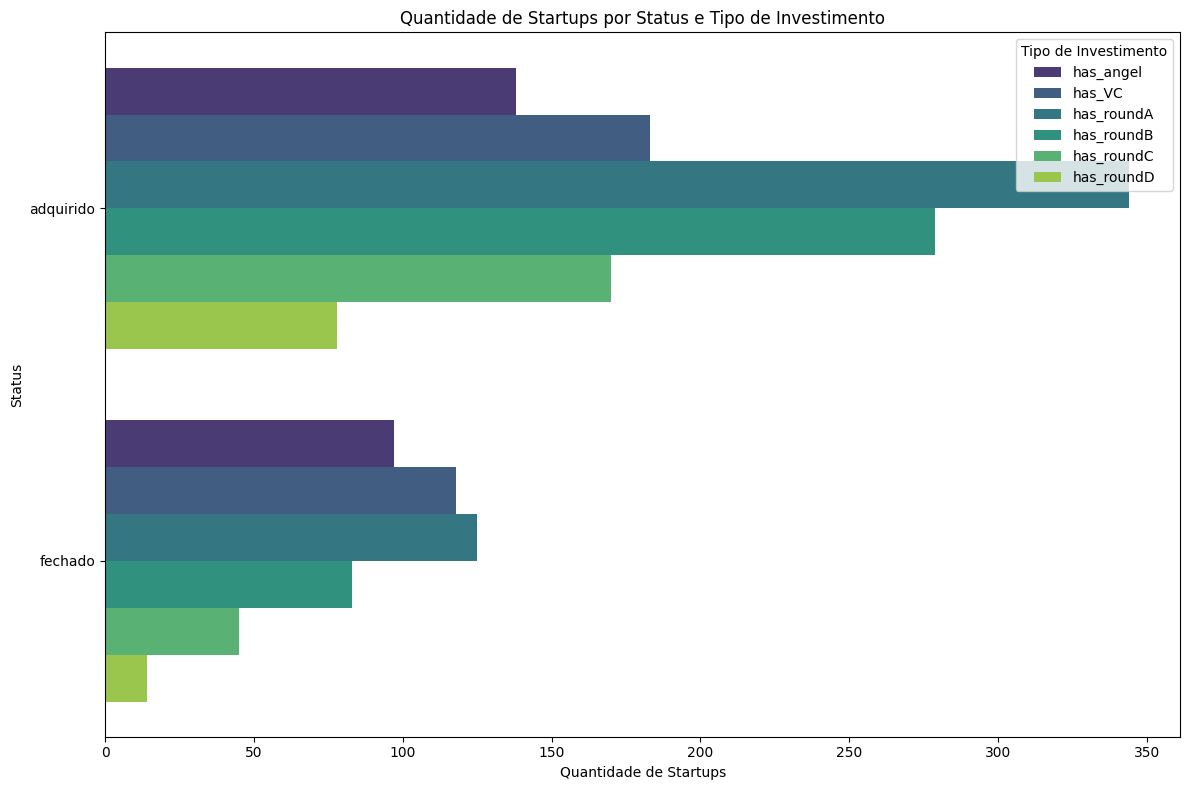

In [21]:
status_investimento = cleaned_data.groupby('status')[colunas_investimento].sum().reset_index()

status_investimento_melted = status_investimento.melt(id_vars='status', var_name='Tipo de Investimento', value_name='Quantidade')

plt.figure(figsize=(12, 8))
sns.barplot(data=status_investimento_melted, x='Quantidade', y='status', hue='Tipo de Investimento', palette='viridis')

plt.xlabel('Quantidade de Startups')
plt.ylabel('Status')
plt.title('Quantidade de Startups por Status e Tipo de Investimento')
plt.legend(title='Tipo de Investimento', loc='upper right')
plt.tight_layout()

plt.show()

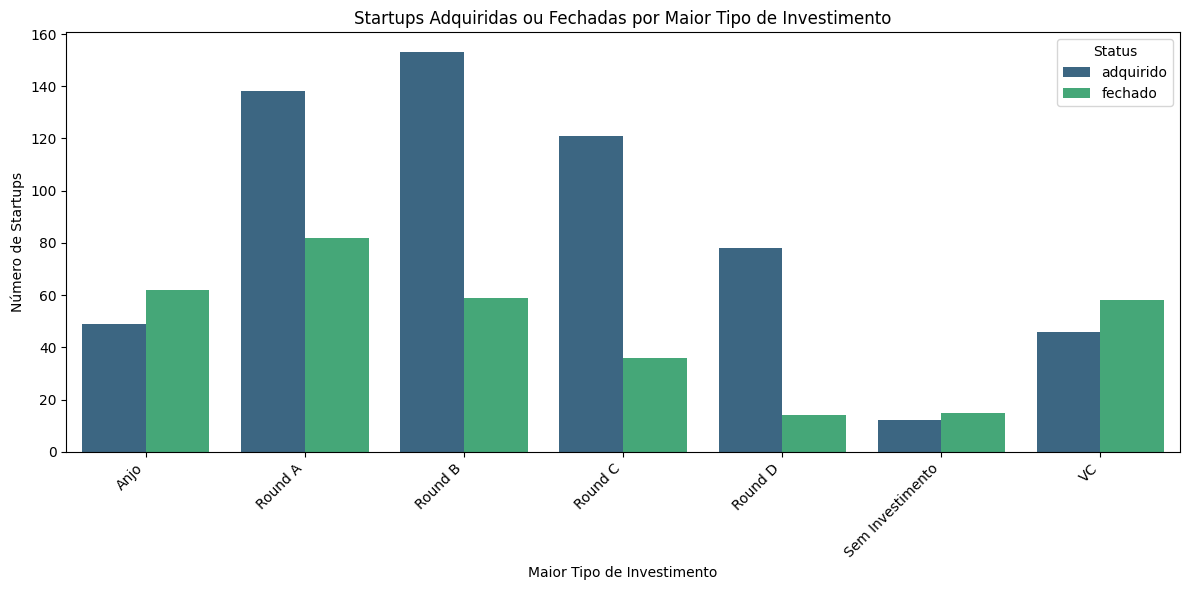

In [22]:
def maior_investimento(coluna):
    if coluna['has_roundD'] == 1:
        return 'Round D'
    elif coluna['has_roundC'] == 1:
        return 'Round C'
    elif coluna['has_roundB'] == 1:
        return 'Round B'
    elif coluna['has_roundA'] == 1:
        return 'Round A'
    elif coluna['has_VC'] == 1:
        return 'VC'
    elif coluna['has_angel'] == 1:
        return 'Anjo'
    else:
        return 'Sem Investimento'

cleaned_data['maior_investimento'] = cleaned_data.apply(maior_investimento, axis=1)

maior_investimento_count = cleaned_data.groupby(['maior_investimento', 'status']).size().unstack(fill_value=0).reset_index()

maior_investimento_melted = maior_investimento_count.melt(id_vars='maior_investimento', var_name='status', value_name='count')

plt.figure(figsize=(12, 6))
sns.barplot(data=maior_investimento_melted, x='maior_investimento', y='count', hue='status', palette='viridis')

plt.title('Startups Adquiridas ou Fechadas por Maior Tipo de Investimento')
plt.xlabel('Maior Tipo de Investimento')
plt.ylabel('Número de Startups')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Status')
plt.tight_layout()

plt.show()

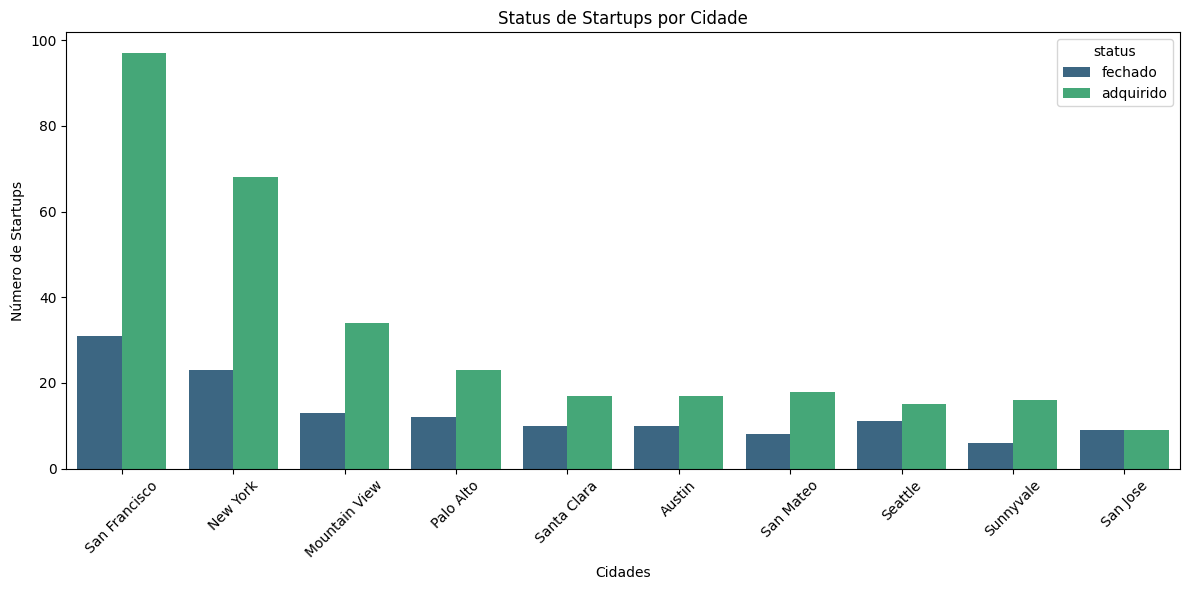

In [23]:
top_cidades = cleaned_data['city'].value_counts().nlargest(10).index
ordem_cidades = cleaned_data[cleaned_data['city'].isin(top_cidades)]['city'].value_counts().loc[top_cidades].index

plt.figure(figsize=(12, 6))
sns.countplot(x='city', hue='status', data=cleaned_data[cleaned_data['city'].isin(top_cidades)], order=ordem_cidades, palette='viridis')

plt.title("Status de Startups por Cidade")
plt.ylabel('Número de Startups')
plt.xlabel('Cidades')
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

<ipython-input-24-c00bc3a11cb9>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=count_tipo, x='Tipo', y='Contagem', palette='viridis')


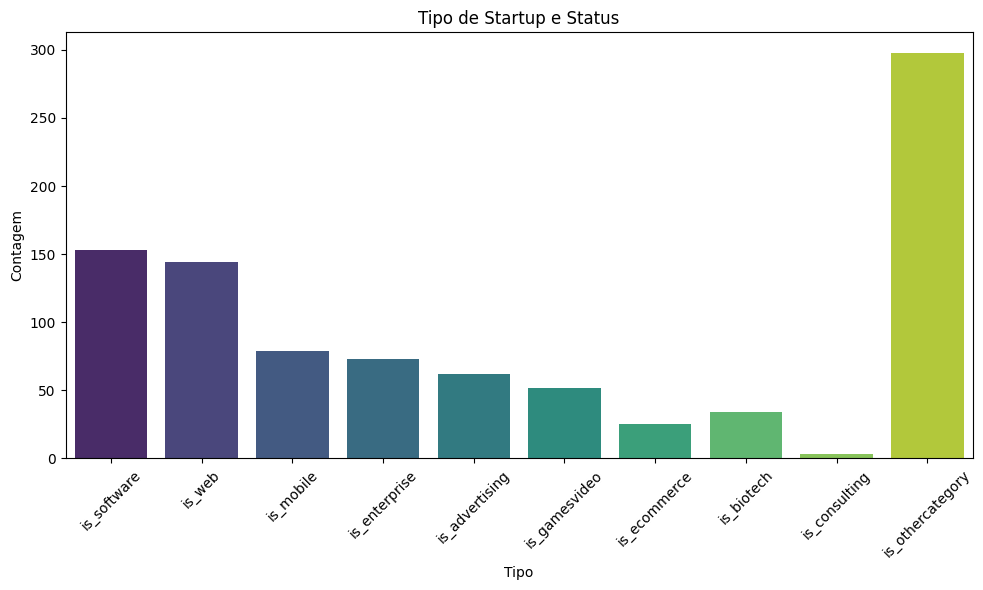

In [24]:
colunas_tipo = [
    'is_software', 'is_web', 'is_mobile', 'is_enterprise',
    'is_advertising', 'is_gamesvideo', 'is_ecommerce',
    'is_biotech', 'is_consulting', 'is_othercategory'
]

count_tipo = cleaned_data[colunas_tipo].sum().reset_index()
count_tipo.columns = ['Tipo', 'Contagem']  # Rename the columns for clarity

plt.figure(figsize=(10, 6))
sns.barplot(data=count_tipo, x='Tipo', y='Contagem', palette='viridis')

plt.title('Tipo de Startup e Status')
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

<ipython-input-25-f254d1d01385>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=acquired_counts, x='founded_year', y='acquired', palette='viridis')


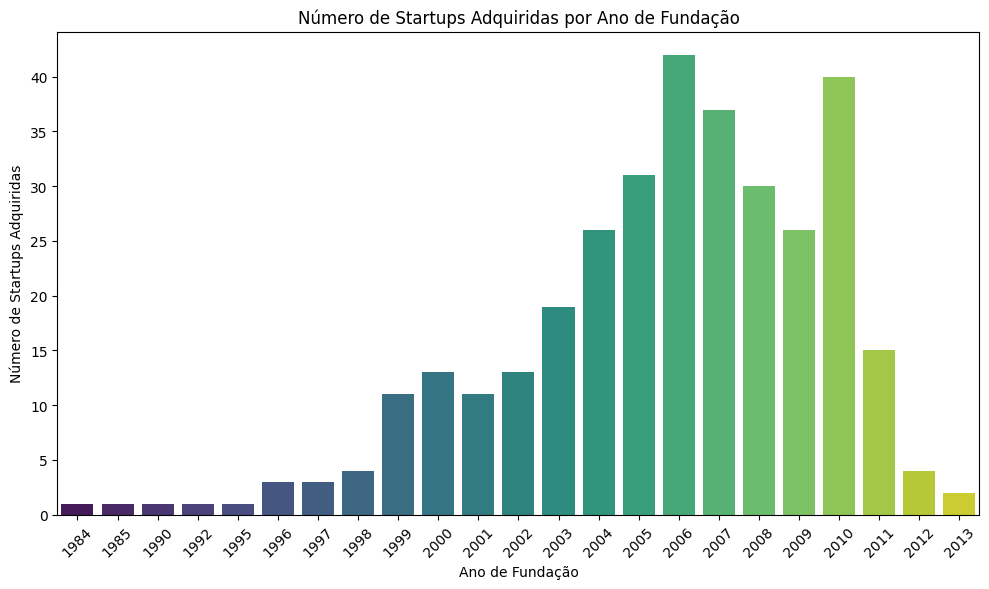

In [25]:
cleaned_data['founded_at'] = pd.to_datetime(cleaned_data['founded_at'])
cleaned_data['closed_at'] = pd.to_datetime(cleaned_data['closed_at'])

cleaned_data['founded_year'] = cleaned_data['founded_at'].dt.year

cleaned_data['acquired'] = cleaned_data['closed_at'].notnull()

acquired_counts = cleaned_data.groupby('founded_year')['acquired'].sum().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(data=acquired_counts, x='founded_year', y='acquired', palette='viridis')

plt.xlabel('Ano de Fundação')
plt.ylabel('Número de Startups Adquiridas')
plt.title('Número de Startups Adquiridas por Ano de Fundação')
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

<ipython-input-26-cc4de92aef60>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=avg_funding_by_category, x='category_code', y='funding_total_usd', palette='viridis')


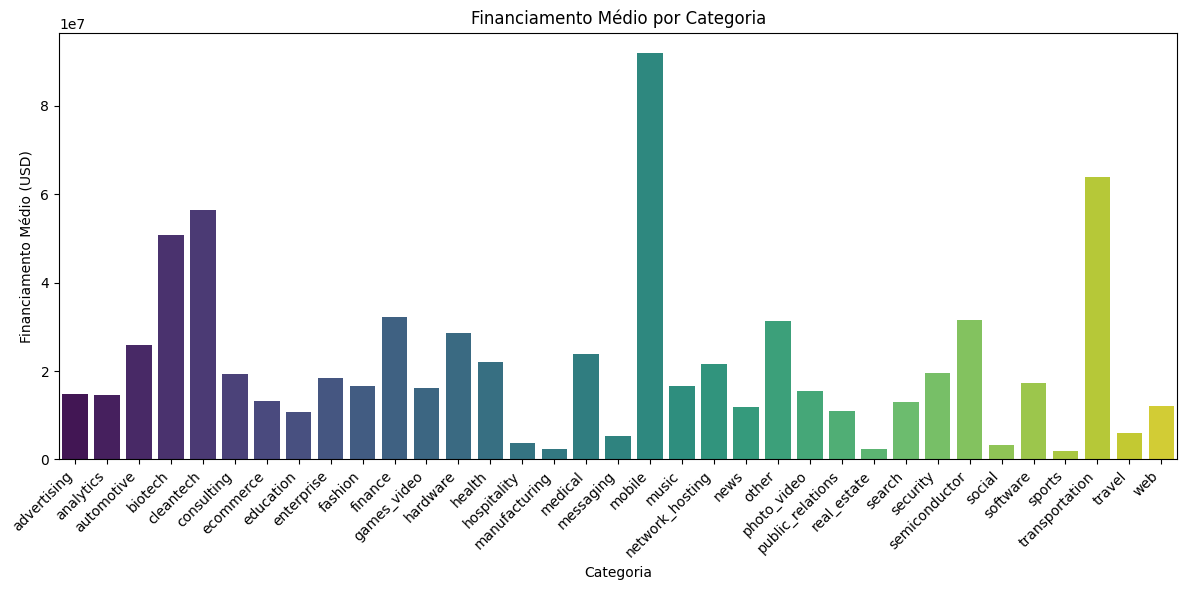

In [26]:
avg_funding_by_category = cleaned_data.groupby('category_code')['funding_total_usd'].mean().reset_index()

plt.figure(figsize=(12, 6))

sns.barplot(data=avg_funding_by_category, x='category_code', y='funding_total_usd', palette='viridis')

plt.xlabel('Categoria')
plt.ylabel('Financiamento Médio (USD)')
plt.title('Financiamento Médio por Categoria')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

## Modelagem de Dados

In [28]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

cleaned_data['status'] = cleaned_data['status'].map({'adquirido': 1, 'fechado': 0})

features = ['has_VC', 'has_angel', 'has_roundA', 'has_roundB', 'has_roundC', 'has_roundD', 'avg_participants', 'is_top500']
X = cleaned_data[features]
y = cleaned_data['status']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
report = classification_report(y_test, y_pred)

report

'              precision    recall  f1-score   support\n\n           0       0.53      0.50      0.52       100\n           1       0.73      0.75      0.74       177\n\n    accuracy                           0.66       277\n   macro avg       0.63      0.63      0.63       277\nweighted avg       0.66      0.66      0.66       277\n'

In [29]:
importances = model.feature_importances_

feature_importance_df = pd.DataFrame({
    'Feature': features,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

feature_importance_df

,Feature,Importance
6,avg_participants,0.549661
7,is_top500,0.114800
2,has_roundA,0.073096
3,has_roundB,0.069149
0,has_VC,0.057082
4,has_roundC,0.055367
1,has_angel,0.042993
5,has_roundD,0.037854


<ipython-input-30-002f0c74ea91>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=feature_importance_df, x='Importance', y='Feature', palette='viridis')


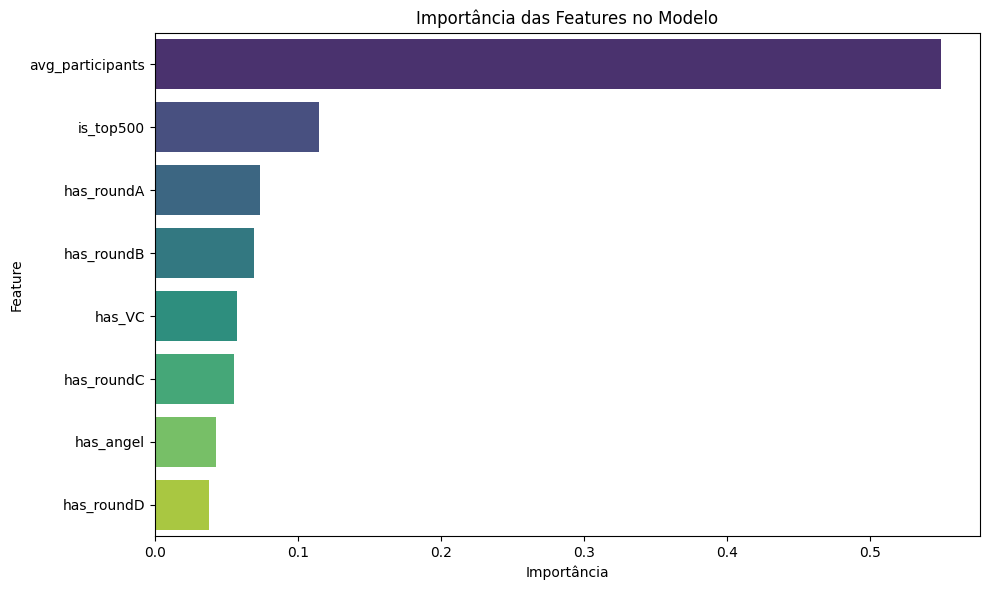

In [30]:
plt.figure(figsize=(10, 6))
sns.barplot(data=feature_importance_df, x='Importance', y='Feature', palette='viridis')
plt.title('Importância das Features no Modelo')
plt.xlabel('Importância')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()